<a href="https://colab.research.google.com/github/NickRubinic2552/class2.ipynb/blob/main/Fortune_1000_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib seaborn


Path to dataset files: /kaggle/input/fortune-top-1000-companies-by-revenue-2022


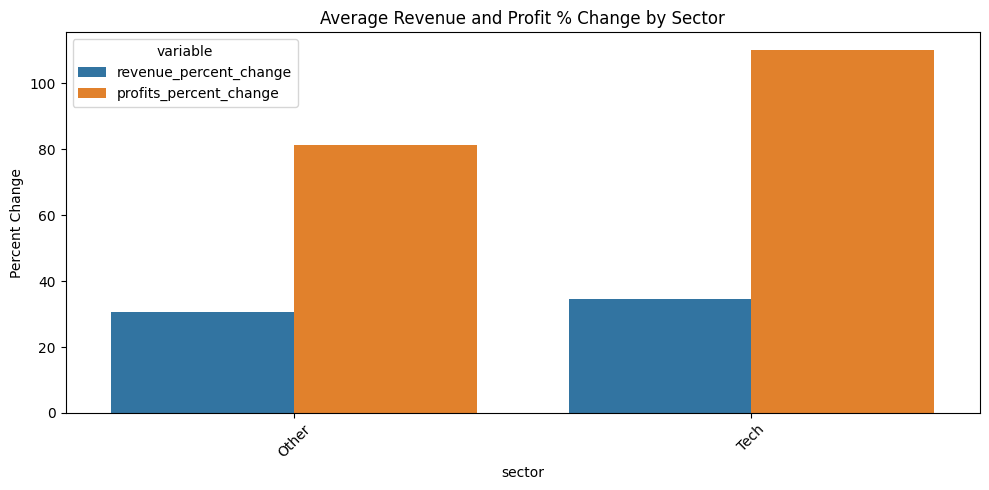

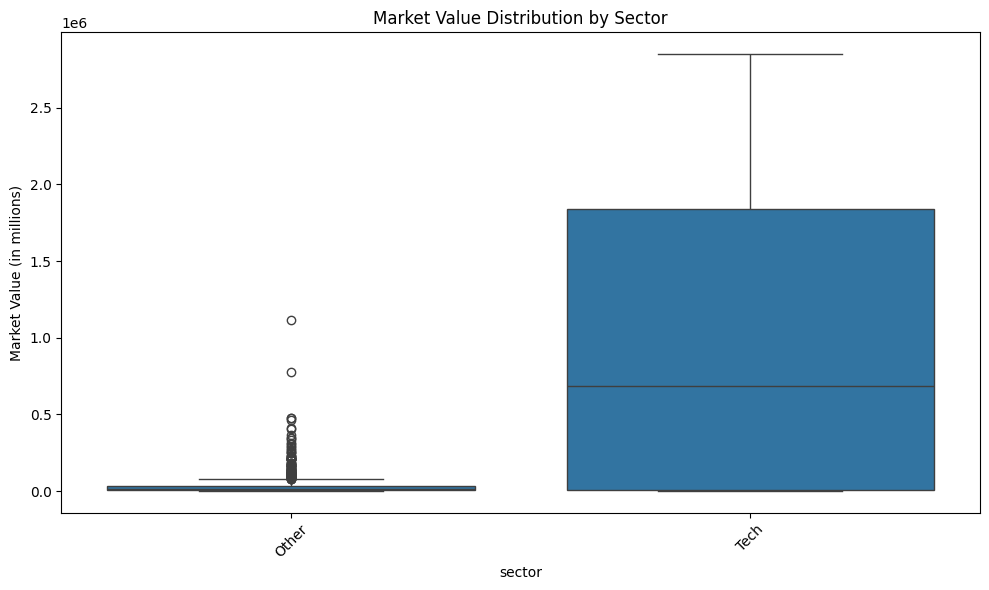

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os


path = kagglehub.dataset_download("surajjha101/fortune-top-1000-companies-by-revenue-2022")

print("Path to dataset files:", path)


csv_file_path = os.path.join(path, "Fortune 1000 Companies by Revenue.csv")


df = pd.read_csv(csv_file_path)


df.columns = df.columns.str.strip()


def clean_numeric(x):
    if isinstance(x, str):
        x = x.replace('$', '').replace(',', '').replace('%', '').replace('—', '').strip()
        return pd.to_numeric(x, errors='coerce')
    return x

for col in ['revenues', 'revenue_percent_change', 'profits', 'profits_percent_change',
            'assets', 'market_value', 'employees']:
    df[col] = df[col].apply(clean_numeric)

df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
df['change_in_rank'] = pd.to_numeric(df['change_in_rank'], errors='coerce')


tech_keywords = ['Apple', 'Amazon', 'Microsoft', 'Alphabet', 'Meta', 'Nvidia']
df['sector'] = df['name'].apply(lambda x: 'Tech' if any(k in x for k in tech_keywords) else 'Other')


sector_summary = df.groupby('sector')[['revenue_percent_change', 'profits_percent_change']].mean().reset_index()


plt.figure(figsize=(10, 5))
sns.barplot(data=sector_summary.melt(id_vars='sector'),
            x='sector', y='value', hue='variable')
plt.title("Average Revenue and Profit % Change by Sector")
plt.ylabel("Percent Change")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sector', y='market_value')
plt.title("Market Value Distribution by Sector")
plt.ylabel("Market Value (in millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:

sector_map = {
    'Tech': ['Apple', 'Microsoft', 'Alphabet', 'Meta', 'Nvidia', 'Intel', 'Cisco', 'Oracle'],
    'Retail': ['Amazon', 'Walmart', 'Costco', 'Target', 'Home Depot', 'Lowe\'s', 'Best Buy'],
    'Healthcare': ['UnitedHealth', 'CVS', 'Pfizer', 'Johnson & Johnson', 'Merck', 'AbbVie', 'Amgen'],
    'Financials': ['JPMorgan', 'Goldman Sachs', 'Bank of America', 'Citigroup', 'Wells Fargo'],
    'Energy': ['Exxon', 'Chevron', 'ConocoPhillips', 'Halliburton'],
    'Telecom': ['Verizon', 'AT&T', 'T-Mobile'],
    'Automotive': ['Ford', 'General Motors', 'Tesla'],
    'Food & Beverage': ['PepsiCo', 'Coca-Cola', 'Kraft Heinz', 'Mondelez'],
    'Transportation': ['FedEx', 'UPS', 'Delta', 'United Airlines', 'American Airlines'],
    'Utilities': ['Duke Energy', 'Southern Company', 'Exelon']
}


In [7]:
def classify_sector(company_name):
    for sector, keywords in sector_map.items():
        if any(keyword in company_name for keyword in keywords):
            return sector
    return 'Other'


df['sector'] = df['name'].apply(classify_sector)


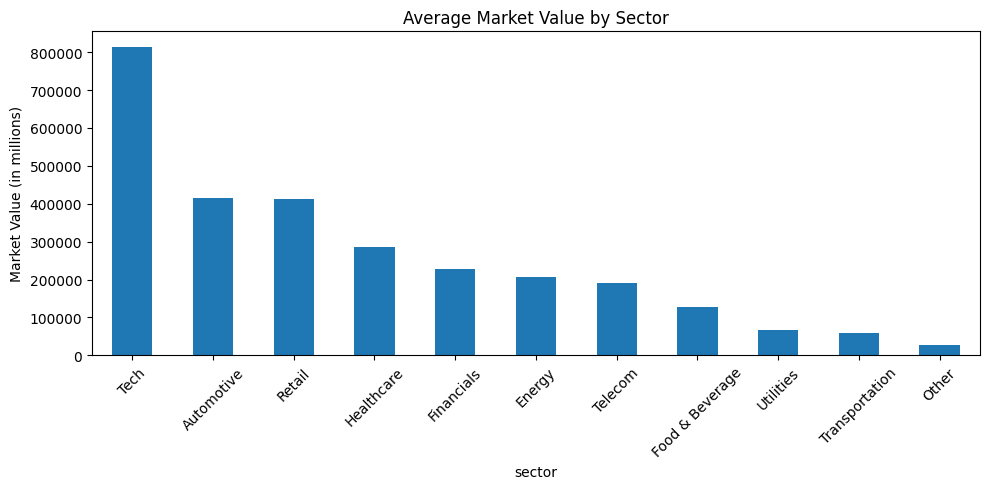

In [8]:

df.groupby('sector')['market_value'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Average Market Value by Sector")
plt.ylabel("Market Value (in millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


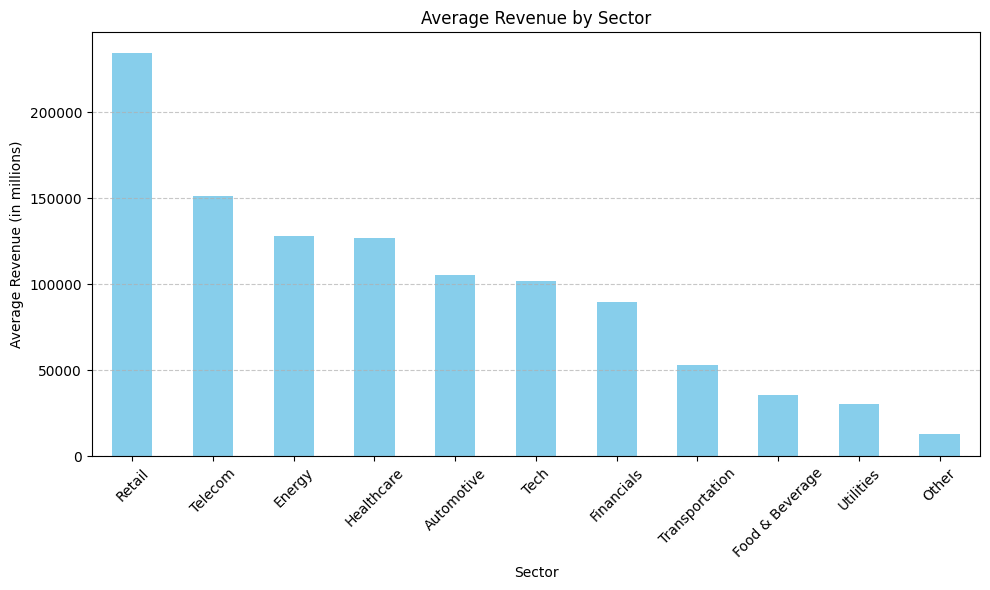

In [9]:
import matplotlib.pyplot as plt

avg_revenue_by_sector = df.groupby('sector')['revenues'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
avg_revenue_by_sector.plot(kind='bar', color='skyblue')
plt.title("Average Revenue by Sector")
plt.ylabel("Average Revenue (in millions)")
plt.xlabel("Sector")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:

df_sorted = df.sort_values(['sector', 'revenues'], ascending=[True, False])


top_companies = df_sorted.drop_duplicates(subset='sector', keep='first')

top_companies = top_companies[['sector', 'name', 'revenues', 'market_value', 'profits']]


top_companies = top_companies.sort_values(by='revenues', ascending=False)


print(top_companies)


             sector                name  revenues  market_value  profits
0            Retail             Walmart  572754.0      409795.0  13673.0
2              Tech               Apple  365817.0     2849537.6  94680.0
3        Healthcare          CVS Health  292111.0      132839.2   7910.0
5            Energy         Exxon Mobil  285640.0      349652.4  23040.0
6             Other  Berkshire Hathaway  276094.0      779542.3  89795.0
12          Telecom                AT&T  168864.0      169262.4  20081.0
21       Automotive          Ford Motor  136341.0       67958.2  17937.0
23       Financials      JPMorgan Chase  127202.0      402526.9  48334.0
33   Transportation                 UPS   97287.0      186816.6  12890.0
44  Food & Beverage             PepsiCo   79474.0      231528.2   7618.0
98        Utilities              Exelon   36347.0       46683.9   1706.0


In [11]:

df_sorted_low = df.sort_values(['sector', 'revenues'], ascending=[True, True])


worst_companies = df_sorted_low.drop_duplicates(subset='sector', keep='first')

worst_companies = worst_companies[['sector', 'name', 'revenues', 'market_value', 'profits']]


worst_companies = worst_companies.sort_values(by='revenues', ascending=True)

print(worst_companies)


              sector                           name  revenues  market_value  \
999            Other                       DocuSign    2107.2       21302.8   
964             Tech  Alpha Metallurgical Resources    2258.6        2447.5   
559  Food & Beverage         Coca-Cola Consolidated    5562.7        4657.3   
240           Energy                    Halliburton   15295.0       34028.9   
145   Transportation       United Airlines Holdings   24634.0       15049.7   
144        Utilities                    Duke Energy   24677.0       85967.0   
139       Healthcare                          Amgen   25979.0      134700.8   
67            Retail                       Best Buy   51761.0       20473.2   
64        Automotive                          Tesla   53823.0     1113707.8   
56        Financials            Goldman Sachs Group   64989.0      117667.6   
22           Telecom         Verizon Communications  133613.0      213837.1   

     profits  
999      NaN  
964    288.8  
559   

          name      sector  revenues  market_value  revenue_market_share (%)  \
21  Ford Motor  Automotive  136341.0       67958.2                  0.758006   
64       Tesla  Automotive   53823.0     1113707.8                  0.299236   

    value_market_share (%)  
21                0.159099  
64                2.607330  


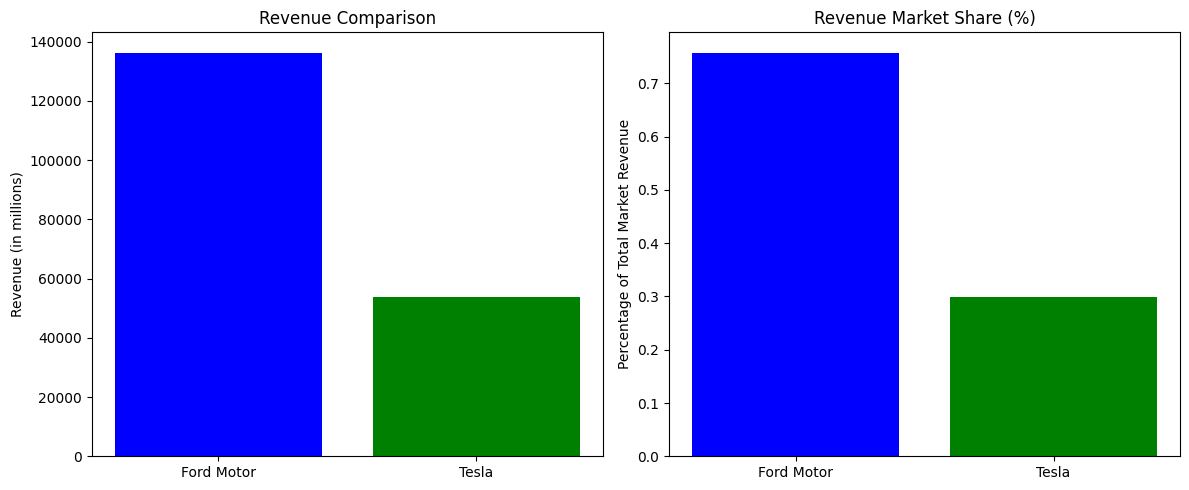

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

ford_tesla_df = df[df['name'].isin(['Ford Motor', 'Tesla'])][['name', 'sector', 'revenues', 'market_value']]


total_revenue = df['revenues'].sum()
total_market_value = df['market_value'].sum()

ford_tesla_df['revenue_market_share (%)'] = (ford_tesla_df['revenues'] / total_revenue) * 100
ford_tesla_df['value_market_share (%)'] = (ford_tesla_df['market_value'] / total_market_value) * 100

print(ford_tesla_df)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(ford_tesla_df['name'], ford_tesla_df['revenues'], color=['blue', 'green'])
axes[0].set_title("Revenue Comparison")
axes[0].set_ylabel("Revenue (in millions)")


axes[1].bar(ford_tesla_df['name'], ford_tesla_df['revenue_market_share (%)'], color=['blue', 'green'])
axes[1].set_title("Revenue Market Share (%)")
axes[1].set_ylabel("Percentage of Total Market Revenue")

plt.tight_layout()
plt.show()


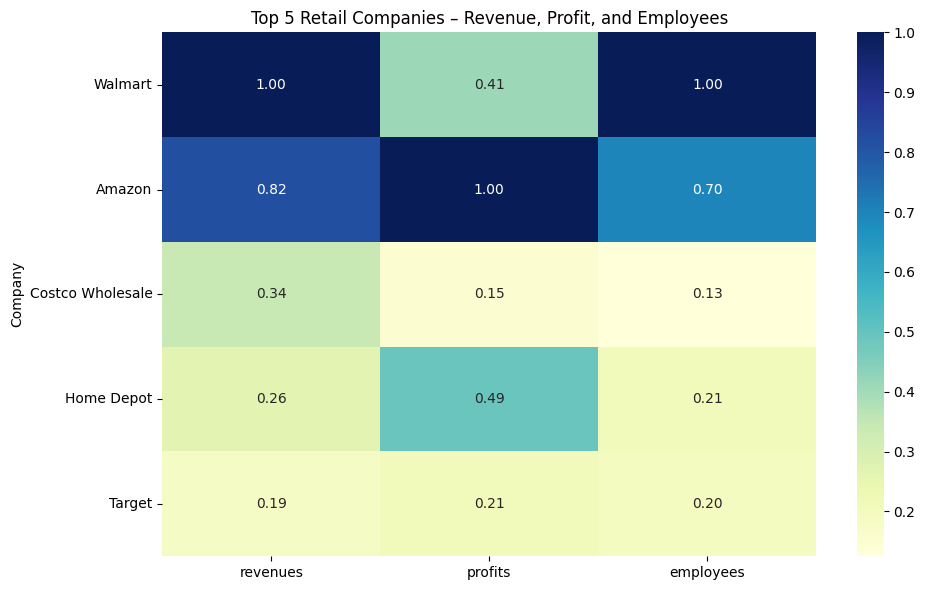

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

retail_df = df[df['sector'] == 'Retail']

top5_retail = retail_df.sort_values(by='revenues', ascending=False).head(5)


heatmap_data = top5_retail[['name', 'revenues', 'profits', 'employees']]

heatmap_data.set_index('name', inplace=True)

normalized_data = heatmap_data / heatmap_data.max()


plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Top 5 Retail Companies – Revenue, Profit, and Employees')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


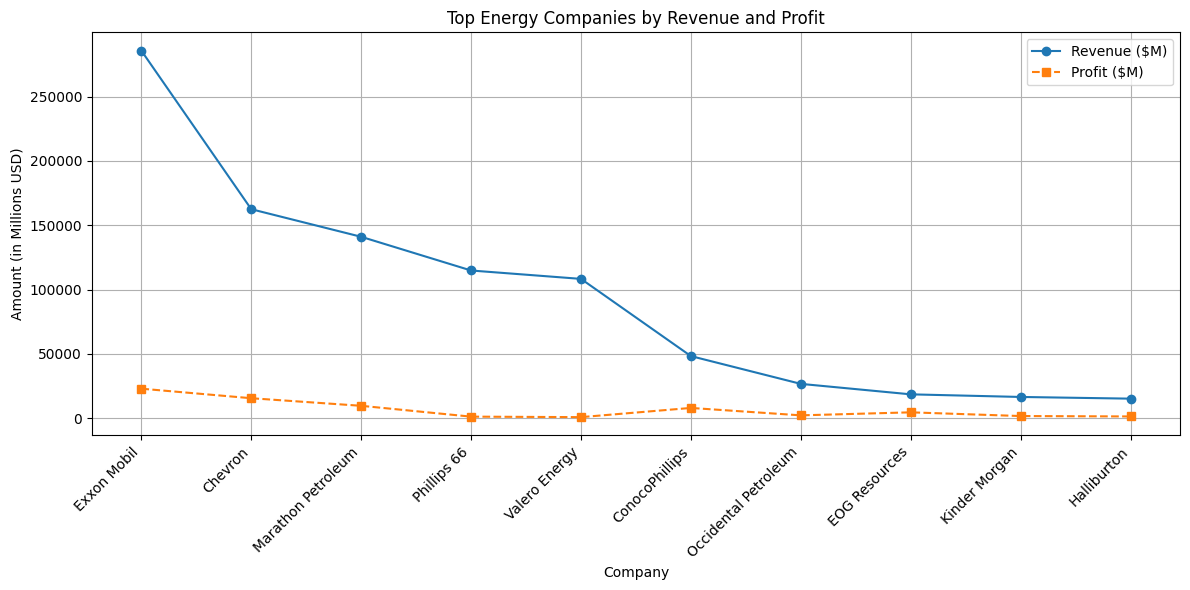

In [14]:
import matplotlib.pyplot as plt


df.columns = [col.strip() for col in df.columns]


energy_companies = [
    'Exxon Mobil', 'Chevron', 'ConocoPhillips', 'Marathon Petroleum',
    'Valero Energy', 'Phillips 66', 'Occidental Petroleum', 'EOG Resources',
    'Kinder Morgan', 'Halliburton'
]

energy_df = df[df['name'].str.strip().isin(energy_companies)].copy()


def clean_money_column(col):
    return pd.to_numeric(col.replace({'\$': '', ',': ''}, regex=True), errors='coerce')

energy_df['revenues'] = clean_money_column(energy_df['revenues'])
energy_df['profits'] = clean_money_column(energy_df['profits'])


energy_df.sort_values(by='revenues', ascending=False, inplace=True)

# Plot revenue and profit comparison
plt.figure(figsize=(12, 6))

# Line chart for revenue and profit
plt.plot(energy_df['name'], energy_df['revenues'], marker='o', label='Revenue ($M)')
plt.plot(energy_df['name'], energy_df['profits'], marker='s', label='Profit ($M)', linestyle='--')

plt.title('Top Energy Companies by Revenue and Profit')
plt.xlabel('Company')
plt.ylabel('Amount (in Millions USD)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
